In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs

In [77]:
X, _ = make_blobs(n_samples=1000, n_features=2, centers=5, random_state=100)

In [78]:
# points.shape

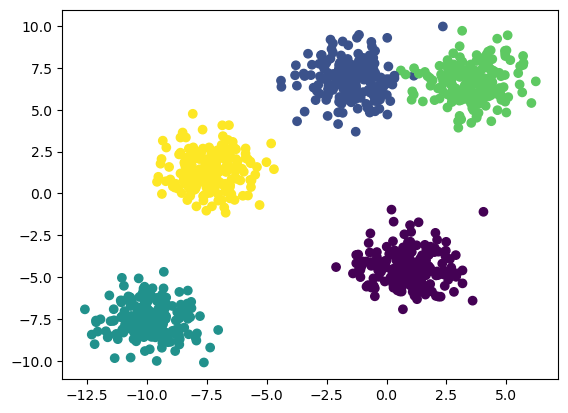

In [79]:
plt.scatter(X[:, 0], X[:, 1], c = _)

# Initialize the center points (clusters)

In [80]:
k = 5
color = ['green','red','blue', 'cyan', 'yellow']

clusters = {}

for i in range(k):
    
    center = np.random.randint(-12, 10, size = (2))
    point = []
    
    cluster = {
        'center':center,
        'point':point,
        'color':color[i]
    }
    clusters[i] = cluster

In [81]:
clusters

{0: {'center': array([-5,  5]), 'point': [], 'color': 'green'},
 1: {'center': array([-2,  3]), 'point': [], 'color': 'red'},
 2: {'center': array([-9,  8]), 'point': [], 'color': 'blue'},
 3: {'center': array([ 6, -9]), 'point': [], 'color': 'cyan'},
 4: {'center': array([ 9, -1]), 'point': [], 'color': 'yellow'}}

In [82]:
def distance_formula(p1, p2):
    dist = ((p1[0]-p2[0])**2 + (p1[1] - p2[1])**2)**0.5
    return dist

In [83]:
print(distance_formula(clusters[0]['center'], X[0]))

3.2324674457199016


In [84]:
# E - Step

def point_to_cluster(clusters):
    
    for i in range(X.shape[0]):
        
        distance = []
        
        for j in range(k):
            
            dist = distance_formula(clusters[j]['center'], X[i])
            
            distance.append(dist)
        
        belong_cluster = np.argmin(distance)
        
        clusters[belong_cluster]['point'].append(X[i])

In [85]:
# M - Step
def update_cluster(clusters):
    
    for i in range(k):
        
        p = np.array(clusters[i]['point'])
        
        if p.shape[0]>0:
            
            u = p.mean(axis = 0)
            
            clusters[i]['center'] = u
            clusters[i]['point'] = []
            

In [86]:
def plot_cluster(clusters):
    
    for i in range(k):
        
        p = np.array(clusters[i]['point'])
        
        if p.shape[0]>0:
            
            plt.scatter(p[:, 0], p[:, 1], c = clusters[i]['color'])
            
        else:
            pass
        
        cluster_center = clusters[i]['center']
        plt.scatter(cluster_center[0], cluster_center[1], c = 'black')
        

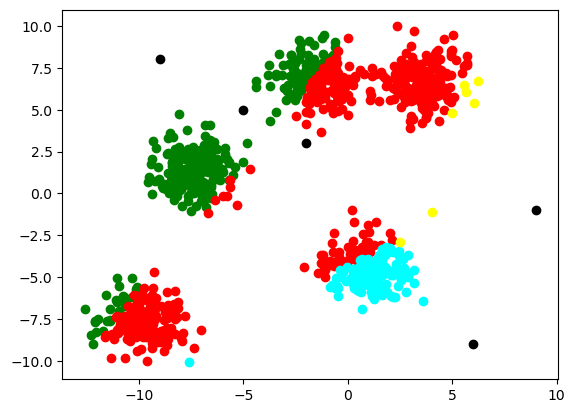

In [87]:
point_to_cluster(clusters)
plot_cluster(clusters)

In [88]:
update_cluster(clusters)

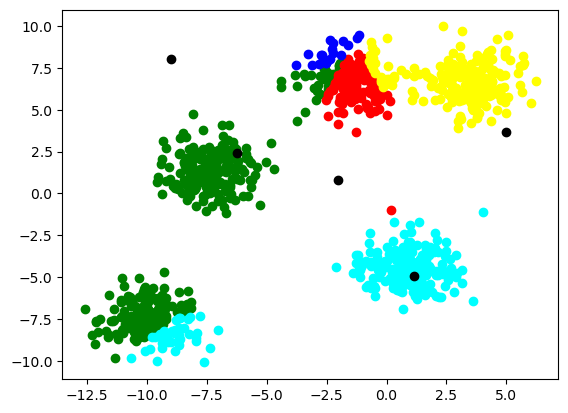

In [89]:
point_to_cluster(clusters)
plot_cluster(clusters)

# Run the below 

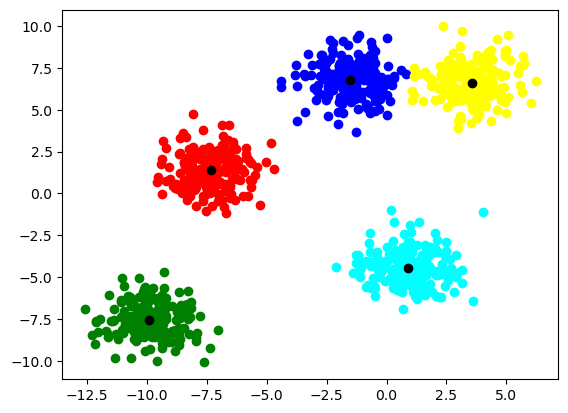

In [103]:
point_to_cluster(clusters)
plot_cluster(clusters)
update_cluster(clusters)